<a href="https://colab.research.google.com/github/shruti-sharma12/IPPR-LAB/blob/main/ippr(lab3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: SHRUTI SHARMA

TY ECE-AIML

PRN:1032211936

EXPERIMENT 3

PART A

Image smoothing

spatial smoothing
-------------------
1. add noise to the given image-------- a. gaussian noise   b. salt pepper noise
2. apply 3 X 3 average filter
3. compare input and output
4. mask size 5X5 to 15X15 and its effect
5. compare median and average filter results for salt and pepper courrupted image6. apply max, min filters

saptial sharpening
-------------------
0  -1   0           -1  -1   -1       
-1  5  -1           -1   9   -1
0  -1   0           -1  -1   -1

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

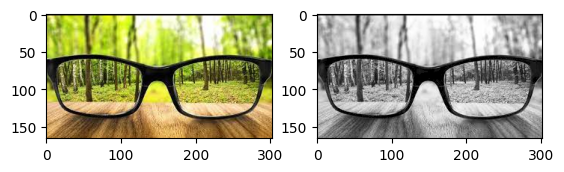

In [2]:
image = cv2.imread('/content/glass.png')
gray_image = cv2.imread('glass.png', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));
plt.subplot(1,2,2)
plt.imshow(gray_image,cmap='gray');

In [3]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    row, col= image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255)
    noisy = noisy.astype(np.uint8)
    return noisy
gauss_image = add_gaussian_noise(gray_image, mean=0, sigma=25)

avgfilter5by5 = cv2.blur(gauss_image,(5,5))
avgfilter15by15 = cv2.blur(gauss_image,(15,15))

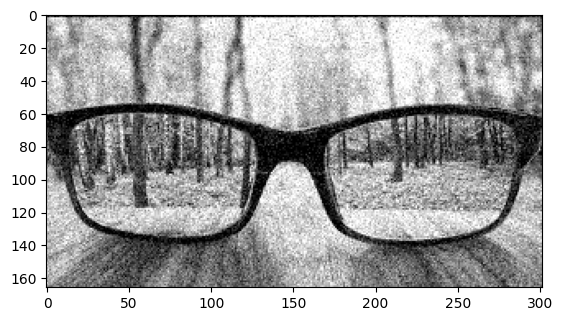

In [5]:
plt.imshow(gauss_image,cmap='gray');

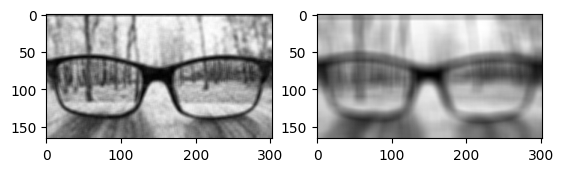

In [6]:
plt.subplot(1,2,1);
plt.imshow(avgfilter5by5,cmap='gray');
plt.subplot(1,2,2);
plt.imshow(avgfilter15by15,cmap='gray');

In [7]:
import random
def add_s_and_p_noise(img):
    row , col = img.shape
    y=img.copy()

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        y[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        y[y_coord][x_coord] = 0

    return y

In [8]:
salt_pepper = add_s_and_p_noise(gray_image);

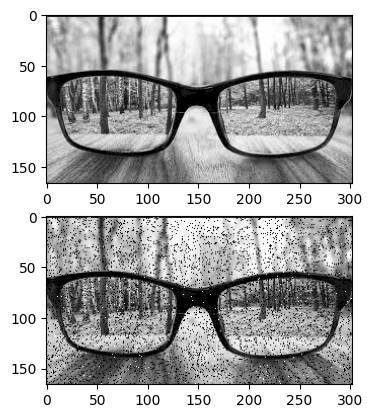

In [9]:
plt.subplot(2,1,1);plt.imshow(gray_image,cmap='gray');
plt.subplot(2,1,2);plt.imshow(salt_pepper,cmap='gray');

PART A-2

In [10]:
ksize = 5
median_filtered = cv2.medianBlur(gray_image, ksize)
median_noise =  cv2.medianBlur(salt_pepper, ksize)

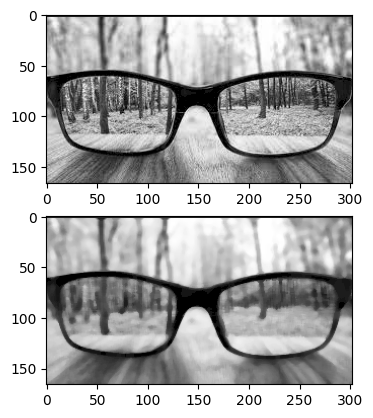

In [11]:
plt.subplot(2,1,1)
plt.imshow(gray_image,cmap='gray');

plt.subplot(2,1,2)
plt.imshow(median_filtered,cmap='gray');

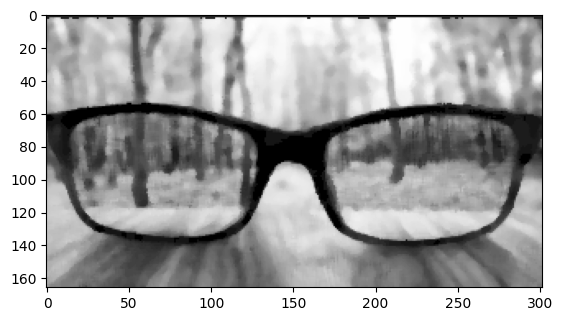

In [12]:
plt.imshow(median_noise,cmap='gray');

In [13]:
kernel = np.ones((5, 5), np.uint8)

# Apply Minimum Filter (Erosion)
min_filtered = cv2.erode(gray_image, kernel)
min_noise = cv2.erode(salt_pepper, kernel)

max_filtered = cv2.dilate(gray_image, kernel)
max_noise = cv2.dilate(salt_pepper, kernel)

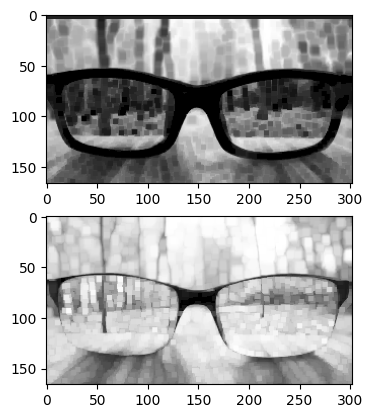

In [15]:
plt.subplot(2,1,1)
plt.imshow(min_filtered,cmap='gray');
plt.subplot(2,1,2)
plt.imshow(max_filtered,cmap='gray');

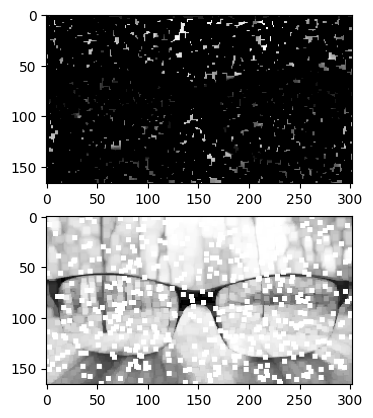

In [16]:
plt.subplot(2,1,1)
plt.imshow(min_noise,cmap='gray');
plt.subplot(2,1,2)
plt.imshow(max_noise,cmap='gray');

PART B

In [17]:
#image sharpening process
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
sharpened_image = gray_image - laplacian

sharp_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

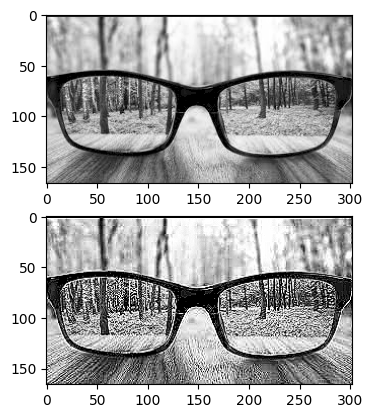

In [18]:
plt.subplot(2,1,1)
plt.imshow(gray_image,cmap='gray');
plt.subplot(2,1,2)
plt.imshow(sharp_image,cmap='gray');

In [19]:
laplacian = cv2.Laplacian(gauss_image, cv2.CV_64F)
sharpened_image = gauss_image - laplacian

sharp_noise = np.clip(sharpened_image, 0, 255).astype(np.uint8)

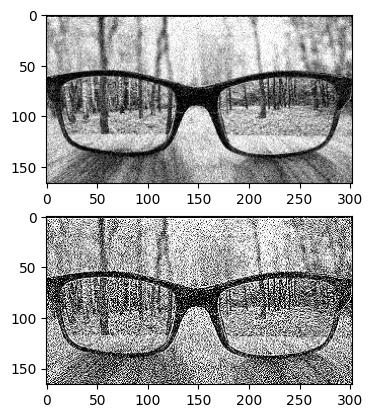

In [20]:
plt.subplot(2,1,1)
plt.imshow(gauss_image,cmap='gray');
plt.subplot(2,1,2)
plt.imshow(sharp_noise,cmap='gray');

### Conclusion : -
1. We learn to add  gaussian noise and salt-pepper noise to an image.
2. We learnt about image sharpening.
3. We applied different types of filters on the noisy images
4. We used filters such as min,max,median and laplacian.

POST LAB QUESTIONS:

### 1. Write a note on Sharpening Filters.
### Ans :
#### - Sharpening filters are image processing techniques used to enhance the clarity and details of an image by accentuating edges and boundaries.
#### - These filters work by increasing the contrast along edges, making them appear more defined. Common sharpening filters include the Unsharp Mask (USM) and the Laplacian filter.
#### - While sharpening can improve image quality, it should be applied judiciously to avoid introducing artifacts and noise.
#### - Sharpening is a crucial tool in image editing, helping to bring out finer details and improve overall visual impact.

### 2. Consider an input image row [4 3 2 1] with intensity values in the range 0 to 15. Determine negative of the image row.
### Ans :
#### - To determine the negative of the input image row, you need to subtract each intensity value from the maximum possible intensity value in the range (which is 15 in this case, as the intensity values range from 0 to 15).

#### Given the input image row [4 3 2 1], the negative can be calculated as follows:

#### 1. Negative of 4: Subtract 4 from the maximum intensity value (15), resulting in 11.
#### 2. Negative of 3: Subtract 3 from the maximum intensity value (15), resulting in 12.
#### 3. Negative of 2: Subtract 2 from the maximum intensity value (15), resulting in 13.
#### 4. Negative of 1: Subtract 1 from the maximum intensity value (15), resulting in 14.

#### So, the negative of the input image row [4 3 2 1] is [11 12 13 14].

### 3. Determine the new value of the central pixel of the following image by applying 3x3 size: a) Mean filter b) Median filter c) Mode filter
[[10,11,11],
 [10,255,11],
 [12,12,11]]

 ### Ans :
##### a)
The mean filter replaces the central pixel value with the average of all the pixel values in the 3x3 neighborhood.
Central pixel value after mean filter:

new value = (10+11+11+10+255+11+12+12+11)/9 = 353/9 = 39.2 --approx 39

##### b)
The median filter replaces the central pixel value with the median of all the pixel values in the 3x3 neighborhood.

Central pixel value after median filter:

Sort the values:
10,10,11,11,11,12,12,255,11

New value = 11

##### c)
The mode filter replaces the central pixel value with the mode of all the pixel values in the 3x3 neighborhood.

Central pixel value after mode filter:
Since all values are unique, there is no mode in this case.
